In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab_me/YOLOv7

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1kb8BWwQ4qdRj7g2oqnBh5nYLqMZ5ReXy/YOLOv7


# Clone source code

In [ ]:
# !git clone https://github.com/WongKinYiu/yolov7.git 
%cd /content/drive/MyDrive/Colab_me/YOLOv7/yolov7
!pip install -r requirements.txt

In [ ]:
# # Tạo thư mục và tải model pretrain
# !mkdir pretrain 
# %cd pretrain

mkdir: cannot create directory ‘pretrain’: File exists
/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/pretrain


# Test YOLOv7

In [ ]:
# Link image
# !wget https://cdn.theculturetrip.com/wp-content/uploads/2017/11/15271255494_fcc90d3f9b_k.jpg

In [ ]:
# Nhận diện thử với weight pretrain
%cd /content/drive/MyDrive/Colab_me/YOLOv7/yolov7
!python detect.py --weights 'pretrain/yolov7.pt' --source '/content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/test_img_YOLO/15271255494_fcc90d3f9b_k.jpg' --name 'exp_img_demo'

/content/drive/.shortcut-targets-by-id/1kb8BWwQ4qdRj7g2oqnBh5nYLqMZ5ReXy/YOLOv7/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp1_img_demo', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/test_img_YOLO/15271255494_fcc90d3f9b_k.jpg', update=False, view_img=False, weights=['pretrain/yolov7.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered in

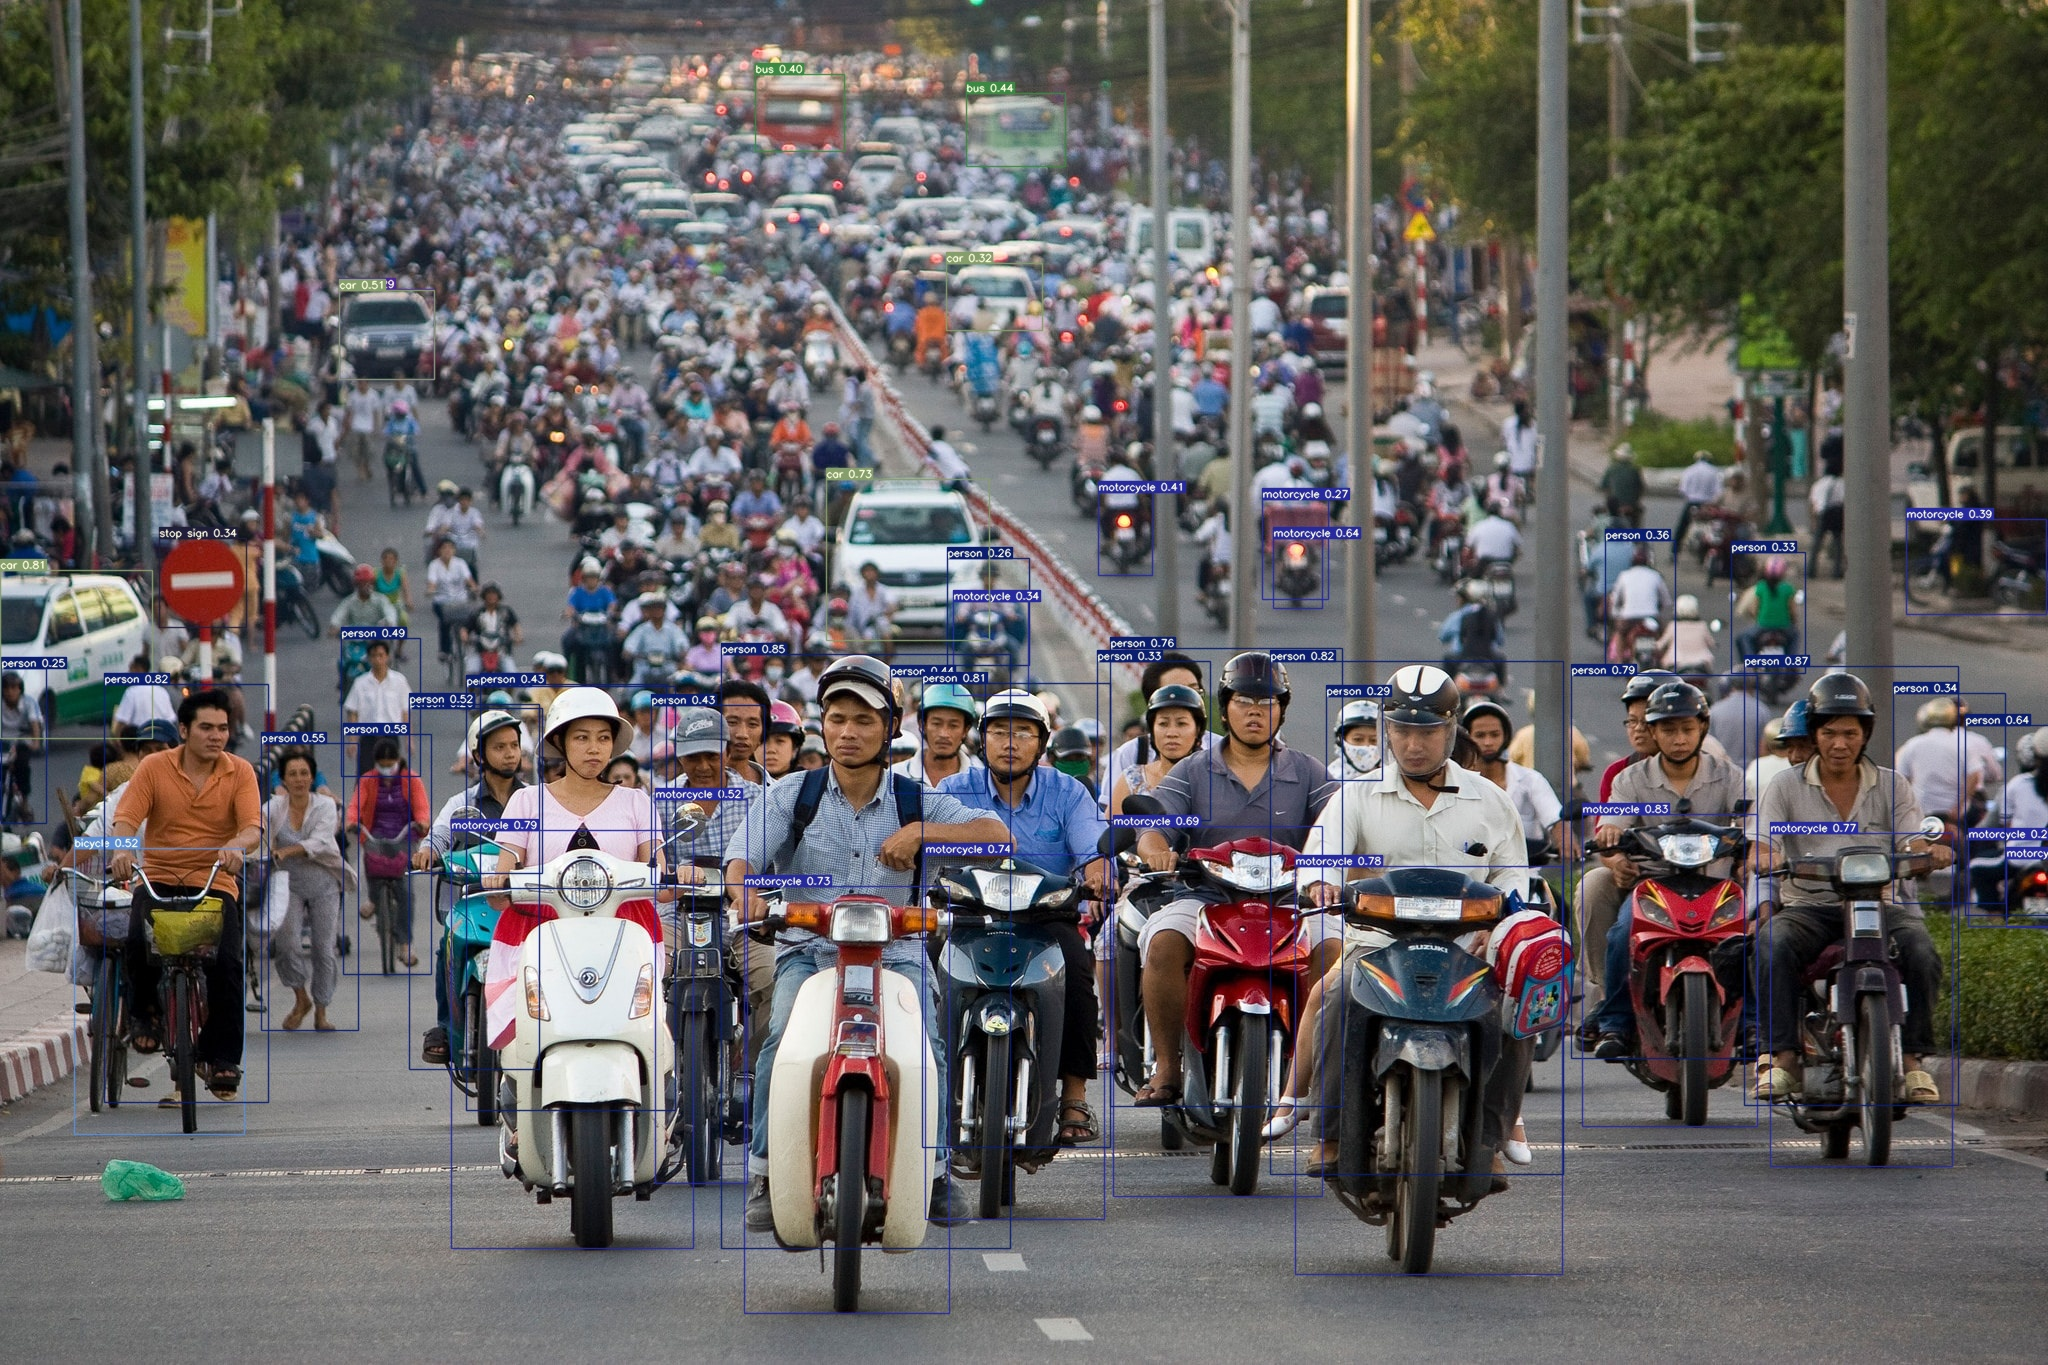

In [ ]:
# Xem ảnh đã nhận diện
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/detect/exp_img_demo/15271255494_fcc90d3f9b_k.jpg"))

# Train model

## Data preparation

In [ ]:
# # Giải nén dữ liệu
# %cd /content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/train_YOLO/images
# !unzip ./train.zip
# %cd /content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/test_YOLO/images
# !unzip ./test.zip

In [ ]:
# %cd /content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/train/train
# !mkdir train_YOLO
# !mkdir train_YOLO/images
# !mkdir train_YOLO/labels
# !mv *.png train_YOLO/images
# !mv *.txt train_YOLO/labels

/content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/train/train


In [ ]:
# %cd /content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/test/test
# !mkdir test_YOLO
# !mkdir test_YOLO/images
# !mkdir test_YOLO/labels
# !mv *.png test_YOLO/images
# !mv *.txt test_YOLO/labels

/content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/test/test


In [ ]:
%cd /content/drive/MyDrive/Colab_me/YOLOv7/yolov7
!rm data/mydataset.yaml # xóa file nếu có

!echo 'train: ../dataset_YOLO/train_YOLO' >> data/mydataset.yaml
!echo 'val: ../dataset_YOLO/test_YOLO' >> data/mydataset.yaml
!echo 'test: ../dataset_YOLO/test_YOLO' >> data/mydataset.yaml

!echo 'nc: 16' >> data/mydataset.yaml
!echo "names: ['banh_bo', 'banh_bot_loc', 'banh_cam', 'banh_chung', 'banh_cuon', 'banh_da_lon', 'banh_it', 'banh_khot', 'banh_mi', 'banh_tet', 'banh_xeo', 'cha_lua', 'che_troi_nuoc', 'goi_cuon', 'nem_ran', 'pho']" >> data/mydataset.yaml

/content/drive/.shortcut-targets-by-id/1kb8BWwQ4qdRj7g2oqnBh5nYLqMZ5ReXy/YOLOv7/yolov7


## Train model

In [ ]:
%cd /content/drive/MyDrive/Colab_me/YOLOv7/yolov7
# Train model YOLOv7 với dữ liệu fire
!python train.py --img 640 640 --batch 16 --epochs 100 --data 'data/mydataset.yaml' --cfg cfg/training/yolov7.yaml --weights 'pretrain/yolov7_training.pt'

YOLOR 🚀 v0.1-115-g072f76c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='data/mydataset.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='pretrain/yolov7_training.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_mom

## Tiếp tục train

In [ ]:
%cd /content/drive/MyDrive/Colab_me/YOLOv7/yolov7
# Train model YOLOv7 với dữ liệu fire
!python train.py --img 640 640 --batch 16 --epochs 100 --data 'data/mydataset.yaml' --cfg cfg/training/yolov7.yaml --weights 'pretrain/yolov7_training.pt' --resume

/content/drive/.shortcut-targets-by-id/1kb8BWwQ4qdRj7g2oqnBh5nYLqMZ5ReXy/YOLOv7/yolov7
Resuming training from ./runs/train/exp/weights/last.pt
YOLOR 🚀 v0.1-115-g072f76c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='data/mydataset.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=True, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='./runs/train/exp/weights/last.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at ht

## Train tiếp epoch

In [ ]:
%cd /content/drive/MyDrive/Colab_me/YOLOv7/yolov7
# Train model YOLOv7 với dữ liệu fire
!python train.py --weights 'runs/train/exp/weights/last.pt' --cfg cfg/training/yolov7.yaml --data 'data/mydataset.yaml' --hyp 'runs/train/exp/hyp.yaml' --epochs 50 --batch 16 --img 640 640   

/content/drive/MyDrive/Colab_me/YOLOv7/yolov7
YOLOR 🚀 v0.1-115-g072f76c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='data/mydataset.yaml', device='', entity=None, epochs=50, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='runs/train/exp/hyp.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp15', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='runs/train/exp/weights/last.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, w

# Predict new model

## Test ảnh xuất KQ ra file

In [ ]:
# Nhận diện thử với model đã train
%cd /content/drive/MyDrive/Colab_me/YOLOv7/yolov7
!python detect.py --weights '/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/train/exp2/weights/best.pt' --source '/content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/test_YOLO/images/img_0893.jpg'
!python detect.py --weights '/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/train/exp2/weights/best.pt' --source '/content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/test_YOLO/images/img_0882.jpg'
!python detect.py --weights '/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/train/exp2/weights/best.pt' --source '/content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/test_YOLO/images/img_1473.jpg'
!python detect.py --weights '/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/train/exp2/weights/best.pt' --source '/content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/test_YOLO/images/img_1483.jpg'
!python detect.py --weights '/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/train/exp2/weights/best.pt' --source '/content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/test_YOLO/images/img_1063.jpg'
!python detect.py --weights '/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/train/exp2/weights/best.pt' --source '/content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/test_YOLO/images/img_1070.jpg'

/content/drive/MyDrive/Colab_me/YOLOv7/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/test_YOLO/images/img_0893.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary

/content/drive/MyDrive/Colab_me/YOLOv7/yolov7


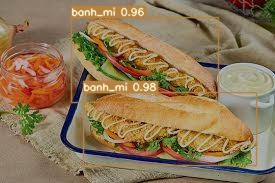

In [ ]:
# Xem ảnh đã nhận diện trong file
from IPython.display import Image, display
%cd /content/drive/MyDrive/Colab_me/YOLOv7/yolov7
display(Image(filename="/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/detect/exp6/img_1063.jpg"))

## Test video xuất KQ ra file

In [ ]:
# Nhận diện Video
%cd /content/drive/MyDrive/Colab_me/YOLOv7/yolov7
!python detect.py --weights '/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/train/exp2/weights/best.pt' --conf 0.35 --img-size 640 --source '/content/drive/MyDrive/Colab_me/YOLOv7/dataset_YOLO/test_video_YOLO/demo_default.mp4'

## Validation trên tập test

In [ ]:
%cd /content/drive/MyDrive/Colab_me/YOLOv7/yolov7

In [ ]:
# IOU = 0.5:0.95
!python test.py --data data/mydataset.yaml --img 640 --batch 32 --conf 0.001 --iou 0.65 --weights '/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/train/exp2/weights/best.pt'

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/mydataset.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.65, name='exp', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36562682 parameters, 6194944 gradients, 103.4 GFLOPS
 Convert 

In [ ]:
# IOU = 0.5
!python test.py --data data/mydataset.yaml --img 640 --batch 32 --conf 0.001 --iou 0.50 --weights '/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/train/exp2/weights/best.pt'

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/mydataset.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='exp', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36562682 parameters, 6194944 gradients, 103.4 GFLOPS
 Convert m

In [ ]:
# IOU = 0.75
!python test.py --data data/mydataset.yaml --img 640 --batch 32 --conf 0.001 --iou 0.75 --weights '/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/train/exp2/weights/best.pt'

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/mydataset.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.75, name='exp', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['/content/drive/MyDrive/Colab_me/YOLOv7/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36562682 parameters, 6194944 gradients, 103.4 GFLOPS
 Convert 